# TP1 – Algorithme de bandit

**Bandit à deux bras A/B**

On fixe :

$\theta_A = 0.4$,  $\theta_B = 0.3$.

Objectif : étudier l’impact de l’exploration sur l’estimation et le gain moyen.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

theta_A = 0.4
theta_B = 0.3

## Fonction de simulation générale

Ecrire une fonction qui, à partir du nombre total de tirage $n$ et des temps Ic où l'on force à tirer les bras A et B, ressort le résultat pour l'algorithme du bandit à dex bras.

In [2]:
def simulate(n, Ic=None):
    if Ic is None:
        Ic = set()

    NA, NB = 0, 0
    SA, SB = 0.0, 0.0

    thetaA_hat = 0.5+np.zeros(n)
    thetaB_hat = 0.5+np.zeros(n)
    G = np.zeros(n)

    total_gain = 0.0

    for k in range(1, n + 1):
        if k in Ic:
            arm = 'A' if k % 2 == 0 else 'B'
        else:
            if NA == 0:
                arm = 'A'
            elif NB == 0:
                arm = 'B'
            else:
                arm = 'A' if thetaA_hat[k-2] >= thetaB_hat[k-2] else 'B'

        if arm == 'A':
            reward = np.random.rand() < theta_A
            NA += 1
            SA += reward
        else:
            reward = np.random.rand() < theta_B
            NB += 1
            SB += reward

        total_gain += reward
        thetaA_hat[k-1] = SA / NA if NA > 0 else 0.0
        thetaB_hat[k-1] = SB / NB if NB > 0 else 0.0
        G[k-1] = total_gain / k

    return thetaA_hat, thetaB_hat, G

## 1. Première configuration : $I_c = \varnothing$

Faire un graphique qui trace l'évoultion des estimateurs, et un autre qui traite l'évolution du gain moyen.

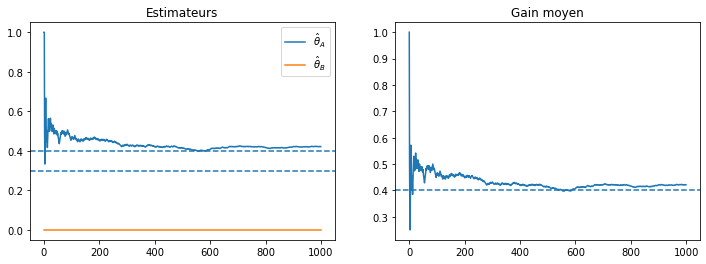

In [3]:
n = 1000
thetaA_hat, thetaB_hat, G = simulate(n)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(thetaA_hat, label=r'$\hat\theta_A$')
plt.plot(thetaB_hat, label=r'$\hat\theta_B$')
plt.axhline(theta_A, linestyle='--')
plt.axhline(theta_B, linestyle='--')
plt.legend()
plt.title('Estimateurs')

plt.subplot(1,2,2)
plt.plot(G)
plt.axhline(theta_A, linestyle='--')
plt.title('Gain moyen')
plt.show()

### Boxplot des gains moyens (50 répétitions)

Faire 50 fois l'algorithme de bandit, et tracer le boxplot des gains moyens.

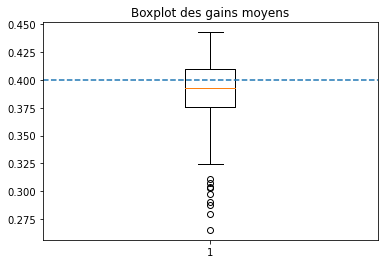

In [4]:
M = 50
gains = np.zeros(M)

for i in range(M):
    _, _, G = simulate(n)
    gains[i] = G[-1]

plt.boxplot(gains)
plt.axhline(theta_A, linestyle='--')
plt.title('Boxplot des gains moyens')
plt.show()

## 2. Deuxième configuration : $c_n = \lceil n^{3/2} \rceil$

Faire un graphique qui trace l'évoultion des estimateurs, et un autre qui traite l'évolution du gain moyen.

In [5]:
def Ic_n_32(n):
    return {int(np.ceil(k**(3/2))) for k in range(1, int(n**(2/3)) + 2)}

Ic = Ic_n_32(n)

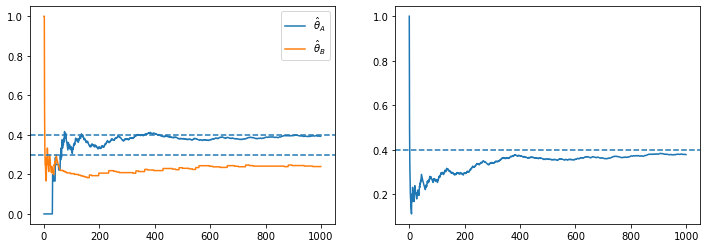

In [6]:
thetaA_hat, thetaB_hat, G = simulate(n, Ic)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(thetaA_hat, label=r'$\hat\theta_A$')
plt.plot(thetaB_hat, label=r'$\hat\theta_B$')
plt.axhline(theta_A, linestyle='--')
plt.axhline(theta_B, linestyle='--')
plt.legend()

plt.subplot(1,2,2)
plt.plot(G)
plt.axhline(theta_A, linestyle='--')
plt.show()

### Histogramme de $\sqrt{n}(G_n-\theta_A)$

Tracer l'histogramme pour 200 réalisations.

In [7]:
M = 200
values = np.zeros(M)

for i in range(M):
    _, _, G = simulate(n, Ic)
    values[i] = np.sqrt(n) * (G[-1] - theta_A)

plt.hist(values, bins=20, density=True)
plt.title(r'$\sqrt{n}(G_n-\theta_A)$')
plt.show()

## 3. Troisième configuration : $c_n = n^3$

Faire un graphique qui trace l'évoultion des estimateurs, et un autre qui traite l'évolution du gain moyen.

In [8]:
def Ic_n_3(n):
    return {int(k**3) for k in range(1, int(n**(1/3)) + 2)}

Ic = Ic_n_3(n)

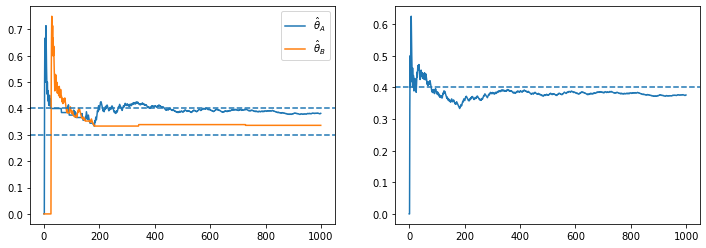

In [9]:
thetaA_hat, thetaB_hat, G = simulate(n, Ic)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(thetaA_hat, label=r'$\hat\theta_A$')
plt.plot(thetaB_hat, label=r'$\hat\theta_B$')
plt.axhline(theta_A, linestyle='--')
plt.axhline(theta_B, linestyle='--')
plt.legend()

plt.subplot(1,2,2)
plt.plot(G)
plt.axhline(theta_A, linestyle='--')
plt.show()

### Histogramme de $\sqrt{n}(G_n-\theta_A)$

Tracer l'histogramme pour 200 réalisations.

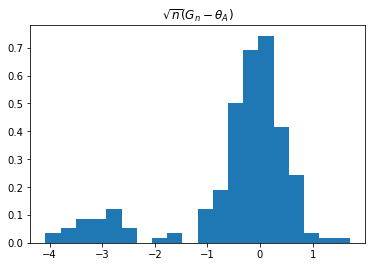

In [10]:
M = 200
values = np.zeros(M)

for i in range(M):
    _, _, G = simulate(n, Ic)
    values[i] = np.sqrt(n) * (G[-1] - theta_A)

plt.hist(values, bins=20, density=True)
plt.title(r'$\sqrt{n}(G_n-\theta_A)$')
plt.show()